# Bike sharing by BoomBikes
## Predicting Number of bikes

#### Problem Statement:

The problem is about predicting demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Reading the dataset
df = pd.read_excel("day.xlsx")

In [108]:
# Let's take a look at the first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
# Let's look at the number of rows and columns in the dataset
df.shape

(730, 16)

In [110]:
#Understanding the feature names in the dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [111]:
# Getting insights of the features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [112]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; Coverting the numeric to string values to understand better

In [113]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
df.loc[(df['season'] == 1) , 'season'] = 'spring'

# 2=summer
df.loc[(df['season'] == 2) , 'season'] = 'summer'

# 3=fall
df.loc[(df['season'] == 3) , 'season'] = 'fall'

# 4=winter
df.loc[(df['season'] == 4) , 'season'] = 'winter'

In [114]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [115]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [116]:
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [117]:
df['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [118]:
#lets map each month to its corresponding month name instead of numeric values which may misindicate some order to it.

def mnth_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']] = df[['mnth']].apply(mnth_map)

In [119]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [120]:
df.mnth.value_counts()

Jul    62
Dec    62
Oct    62
Mar    62
May    62
Jan    62
Aug    62
Apr    60
Sep    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [121]:
#checing on holiday value counts :
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [122]:
#lets map each week day to its corresponding day name instead of numeric values which may misindicate some order to it.

def day_map(x):
    return x.map({1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon',0:'Tue'})

df[['weekday']] = df[['weekday']].apply(day_map)
print(df['weekday'].value_counts())

Mon    105
Tue    105
Wed    105
Thu    104
Sun    104
Sat    104
Fri    103
Name: weekday, dtype: int64


In [123]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [124]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [125]:
#lets map each weather siuation day to its name instead of numeric values which may misindicate some order to it.

def wet_map(x):
    return x.map({1:'weather_1',2:'weather_2',3:'weather_3',4:'weather_4'})

df[['weathersit']] = df[['weathersit']].apply(wet_map)
print(df['weathersit'].value_counts())

weather_1    463
weather_2    246
weather_3     21
Name: weathersit, dtype: int64


In [126]:
df.shape

(730, 16)

### 2. Data Visualization

- Understanding the distribution of various numeric variables 
- check for some obvious multicollinearity going on
- ceheck for any feature/variable having strong association with the outcome variable

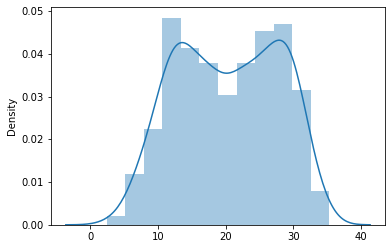

In [127]:
#### Univariate Analysis 
sns.distplot(df[['temp']])
plt.show()

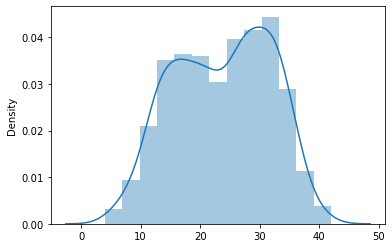

In [128]:
#### Univariate Analysis 
sns.distplot(df[['atemp']])
plt.show()

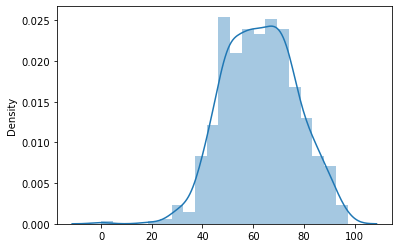

In [129]:
#### Univariate Analysis 
sns.distplot(df[['hum']])
plt.show()

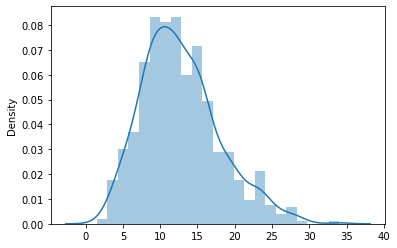

In [130]:
#### Univariate Analysis 
sns.distplot(df[['windspeed']])
plt.show()

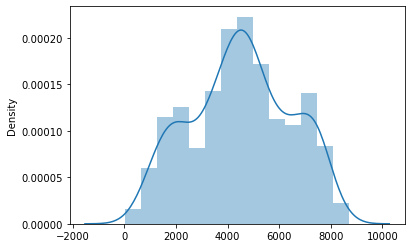

In [131]:
#### Univariate Analysis 
sns.distplot(df[['cnt']])
plt.show()

array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'dteday'}>,
        <AxesSubplot:title={'center':'yr'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

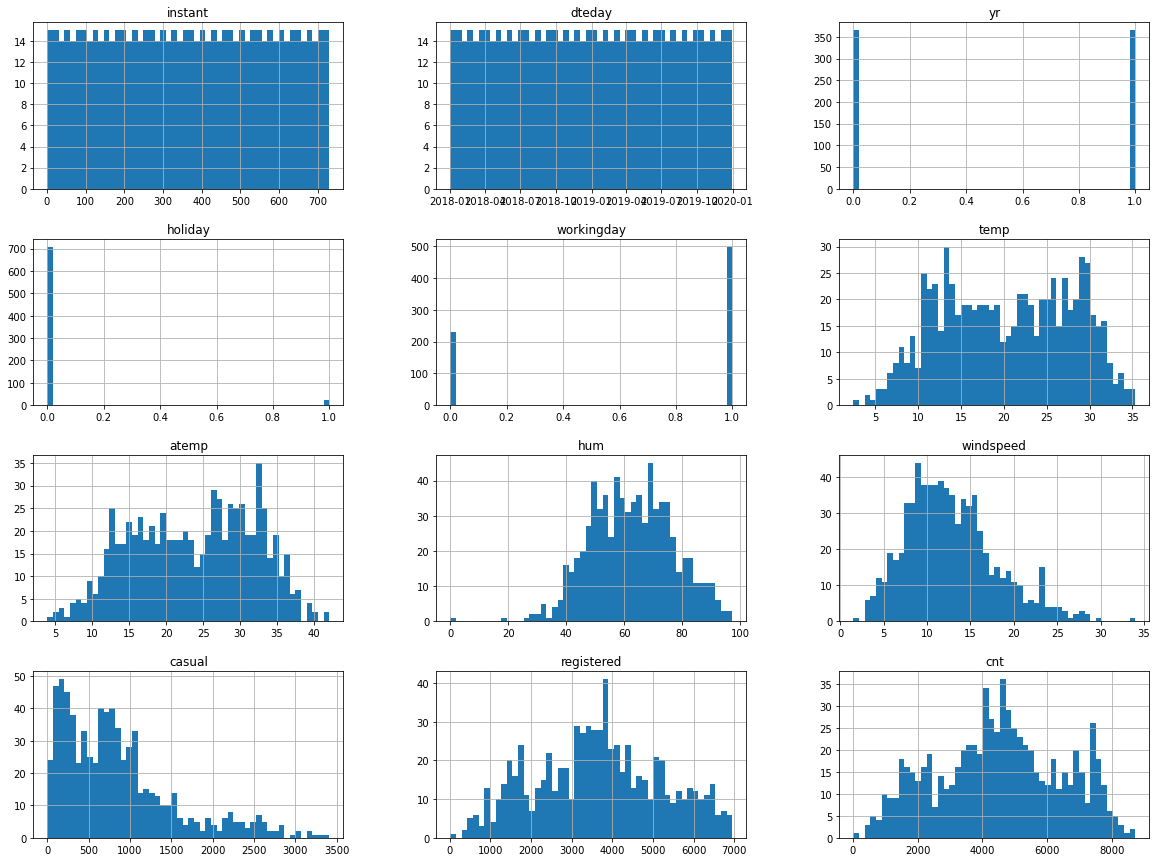

In [132]:
%matplotlib inline               
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))

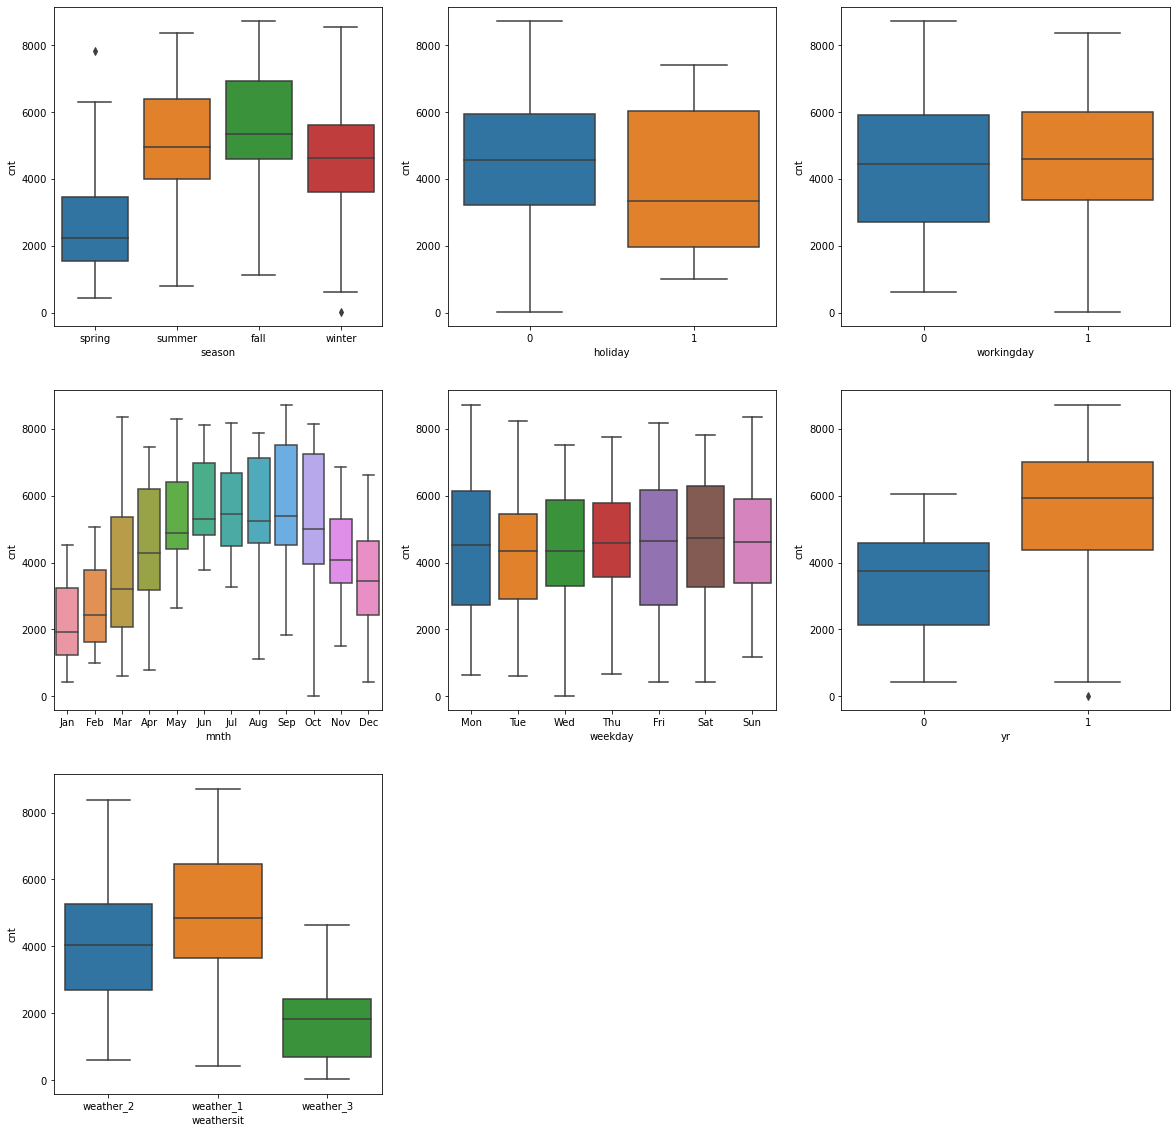

In [133]:
### Bivariate Analysis to understand the relation of all categorical variables wrt cnt valriable

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [135]:
### Bivariate Analysis - to check the correlation of continous valraibles.
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    df[var] = df[var].astype("float")
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [136]:
# Correlation matrix
cor = numeric_df.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


#### we can notice that temp and atemp are highily correlated

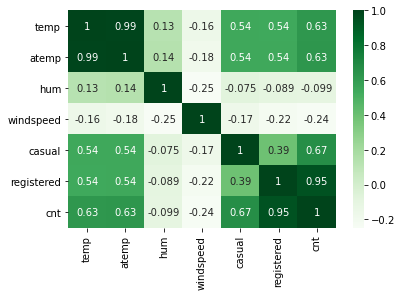

In [137]:
sns.heatmap(data=numeric_df.corr(),cmap='Greens',annot=True)
plt.show()

#### we can notice that temp and atemp are highily correlated

In [138]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True)    

### 3. Data Preparation

- devide the data into categorical variable
- encoding

In [139]:
# Subset all categorical variables
categorical_df=df.select_dtypes(include=['object'])

In [140]:
categorical_df.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,weather_2
1,spring,Jan,Tue,weather_2
2,spring,Jan,Wed,weather_1
3,spring,Jan,Thu,weather_1
4,spring,Jan,Fri,weather_1


In [141]:
# Convert into dummies for the above variables as they are in different levels with multiple categories
df_dummies = pd.get_dummies(categorical_df, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weather_2,weathersit_weather_3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Drop categorical variable columns
df = df.drop(list(categorical_df.columns), axis=1)

In [143]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [144]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df,df_dummies],axis = 1)

In [145]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weather_2,weathersit_weather_3
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   instant               730 non-null    int64         
 1   dteday                730 non-null    datetime64[ns]
 2   yr                    730 non-null    int64         
 3   holiday               730 non-null    int64         
 4   workingday            730 non-null    int64         
 5   temp                  730 non-null    float64       
 6   hum                   730 non-null    float64       
 7   windspeed             730 non-null    float64       
 8   casual                730 non-null    float64       
 9   registered            730 non-null    float64       
 10  cnt                   730 non-null    float64       
 11  season_spring         730 non-null    uint8         
 12  season_summer         730 non-null    uint8         
 13  season_winter       

In [147]:
#dropping instant and dteday as this doesn't add to hany significance
bikedf = df.drop(['instant','dteday'], axis = 1, inplace= False)
bikedf.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weather_2,weathersit_weather_3
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation
- split train and test
- feature scaling
- build linear regression model
- Model Evaluation

In [148]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bikedf, train_size=0.8, test_size=0.2, random_state=100)

### Scaling 

the numerical variables like 'hum','windspeed','temp' are varying in differnt scales and hence scaling is needed to 
normalized in one scale.

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [150]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_weather_2',
       'weathersit_weather_3'],
      dtype='object')

In [151]:
# Apply scaler() to all the numerical columns , which is in differnt scale  
var = ['temp', 'hum', 'windspeed','cnt','casual','registered']

df_train[var] = scaler.fit_transform(df_train[var])

In [152]:
df_train.shape

(584, 31)

In [153]:
df_train[var].describe()

,temp,hum,windspeed,cnt,casual,registered
count,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02
mean,-3.160524e-16,-1.383501e-16,5.584384e-17,9.391270e-17,2.452376e-17,1.178661e-17
std,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00
min,-2.386994e+00,-4.507430e+00,-1.901900e+00,-2.290958e+00,-1.253742e+00,-2.282517e+00
25%,-8.763408e-01,-7.886914e-01,-7.161146e-01,-7.332964e-01,-7.852143e-01,-7.508416e-01
50%,3.454239e-02,2.925235e-02,-1.470392e-01,3.129011e-02,-1.905587e-01,-4.294771e-03
75%,8.843166e-01,7.138525e-01,5.414641e-01,7.820796e-01,3.721940e-01,7.543286e-01
max,2.054631e+00,2.432430e+00,4.051532e+00,2.150670e+00,3.614792e+00,2.062511e+00


<AxesSubplot:xlabel='temp', ylabel='Density'>

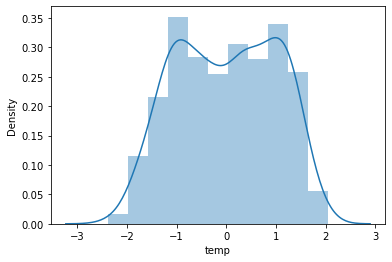

In [154]:
sns.distplot(df_train.temp)

<AxesSubplot:xlabel='hum', ylabel='Density'>

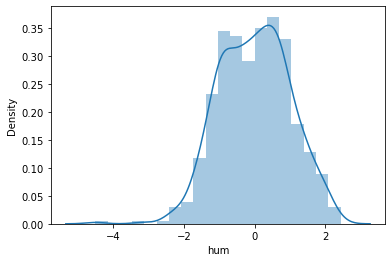

In [155]:
sns.distplot(df_train.hum)

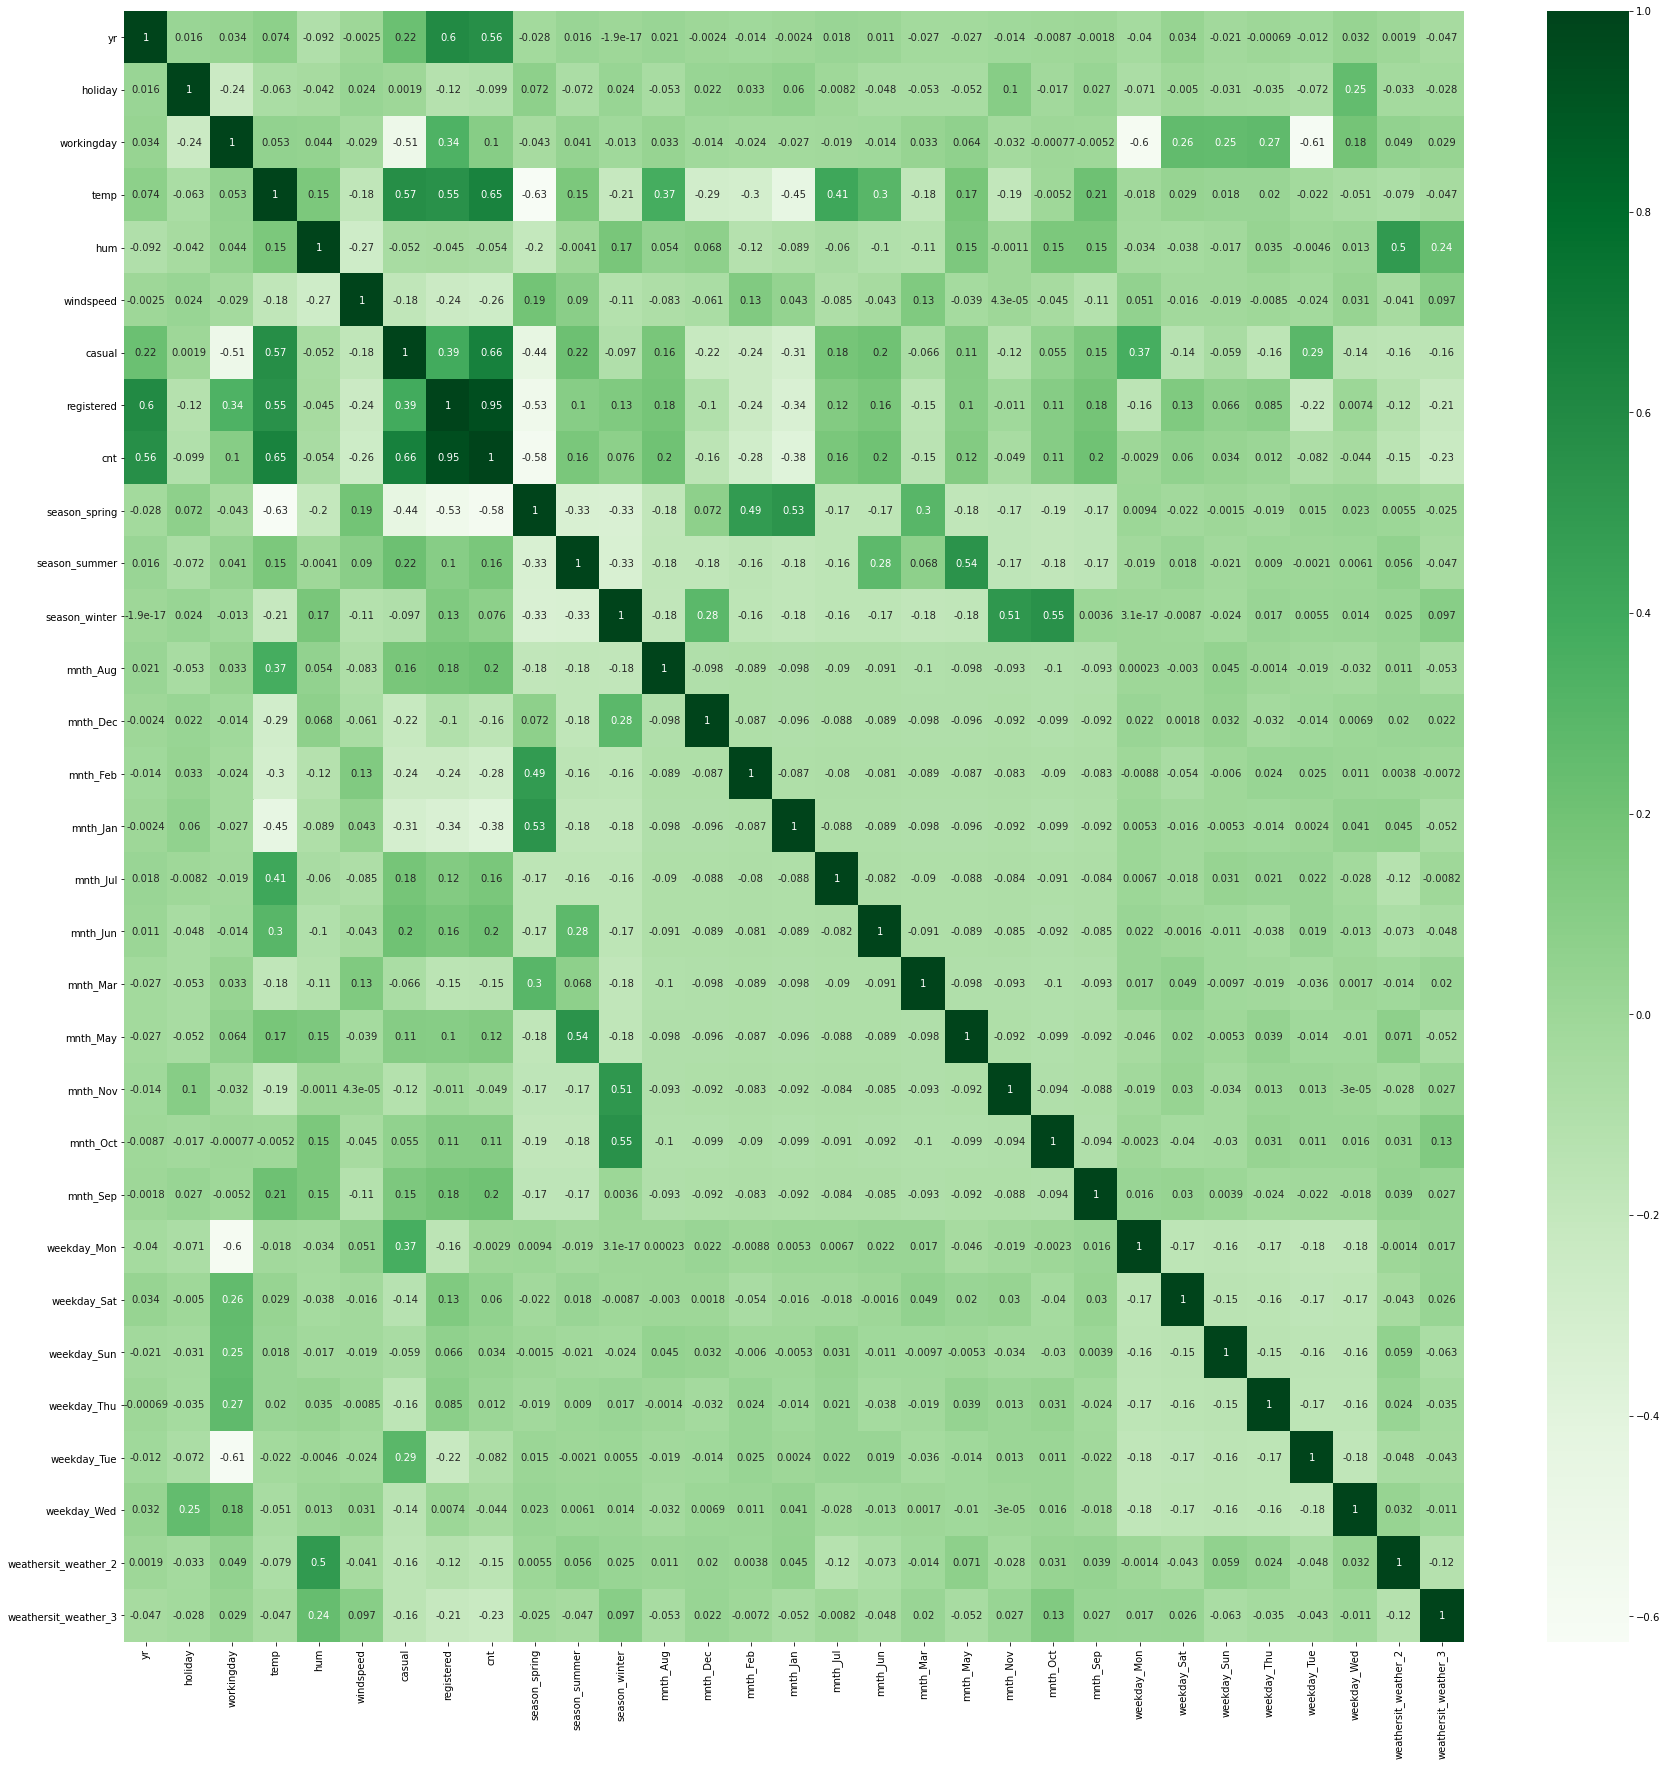

In [156]:
#heatmap to understand which variables are more correlated with cnt 
plt.figure(figsize=(30,30))
sns.heatmap(data=df_train.corr(),cmap='Greens',annot=True)
plt.show()

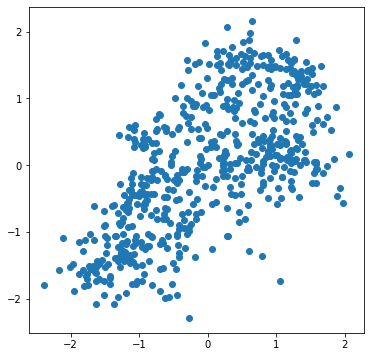

In [157]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [158]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weather_2,weathersit_weather_3
367,1,0,1,-1.884077,-1.351866,2.236778,-1.124647,-0.948143,-1.159600,1,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,-0.306750,-1.193941,-0.119144,-0.019173,1.930767,1.566084,0,...,1,0,0,1,0,0,0,0,0,0
44,0,0,1,-0.417439,-1.819690,2.905344,-0.948068,-1.225432,-1.324653,1,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,-0.938605,0.957450,-0.771827,-0.738844,0.627761,0.256897,0,...,0,0,0,0,1,0,0,0,1,0
379,1,0,0,-1.791834,-1.509791,0.772439,-0.835294,-1.023425,-1.121275,1,...,0,0,0,0,0,0,1,0,0,0


In [159]:
#X_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train.drop(['casual','registered'],axis=1)

In [160]:
y_train.head()

367   -1.159600
648    1.566084
44    -1.324653
705    0.256897
379   -1.121275
Name: cnt, dtype: float64

In [161]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weather_2,weathersit_weather_3
367,1,0,1,-1.884077,-1.351866,2.236778,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,-0.306750,-1.193941,-0.119144,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
44,0,0,1,-0.417439,-1.819690,2.905344,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,-0.938605,0.957450,-0.771827,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
379,1,0,0,-1.791834,-1.509791,0.772439,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


##### building the first model
- First model using statsmodels



In [162]:
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                  -0.454845
yr                      1.017974
holiday                -0.361434
workingday              0.046436
temp                    0.448014
hum                    -0.091865
windspeed              -0.135515
season_spring          -0.247946
season_summer           0.186716
season_winter           0.483833
mnth_Aug                0.073733
mnth_Dec               -0.231363
mnth_Feb               -0.128192
mnth_Jan               -0.262916
mnth_Jul               -0.155501
mnth_Jun                0.040115
mnth_Mar                0.011522
mnth_May                0.079795
mnth_Nov               -0.224076
mnth_Oct                0.057057
mnth_Sep                0.341945
weekday_Mon             0.064555
weekday_Sat            -0.010793
weekday_Sun             0.031493
weekday_Thu            -0.069201
weekday_Tue            -0.204403
weekday_Wed            -0.075201
weathersit_weather_2   -0.263225
weathersit_weather_3   -1.170886
dtype: float64

In [163]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          3.29e-216
Time:                        23:29:28   Log-Likelihood:                -257.63
No. Observations:                 584   AIC:                             571.3
Df Residuals:                     556   BIC:                             693.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4548      0.102     -4.441      0.000      -0.656      -0.254
yr                       1.0180      0.033     31.107      0.000       0.954       1.082
holiday                 -0.3614      0.091     -3.992      0.000      -0.539      -0.184
workingday               0.0464      0.042      1.104      0.270      -0.036       0.129
temp                     0.4480      0.042     10.610      0.000       0.365       0.531
hum                     -0.0919      0.023     -3.977      0.000      -0.137      -0.046
windspeed               -0.1355      0.018     -7.654      0.000      -0.170      -0.101
season_spring           -0.2479      0.121     -2.051      0.041      -0.485      -0.010
season_summer            0.1867      0.107      1.750      0.081      -0.023       0.396
season_winter            0.4838      0.109      4.420      0.000       0.269       0.699
mnth_Aug                 0.0737      0.137      0.539      0.590      -0.195       0.342
mnth_Dec                -0.2314      0.136     -1.696      0.090      -0.499       0.037
mnth_Feb                -0.1282      0.135     -0.952      0.342      -0.393       0.136
mnth_Jan                -0.2629      0.139     -1.893      0.059      -0.536       0.010
mnth_Jul                -0.1555      0.142     -1.095      0.274      -0.434       0.123
mnth_Jun                 0.0401      0.099      0.404      0.686      -0.155       0.235
mnth_Mar                 0.0115      0.104      0.111      0.912      -0.193       0.216
mnth_May                 0.0798      0.085      0.937      0.349      -0.087       0.247
mnth_Nov                -0.2241      0.148     -1.512      0.131      -0.515       0.067
mnth_Oct                 0.0571      0.144      0.396      0.692      -0.226       0.340
mnth_Sep                 0.3419      0.130      2.635      0.009       0.087       0.597
weekday_Mon              0.0646      0.049      1.308      0.191      -0.032       0.162
weekday_Sat             -0.0108      0.060     -0.181      0.857      -0.128       0.107
weekday_Sun              0.0315      0.062      0.511      0.610      -0.090       0.153
weekday_Thu             -0.0692      0.060     -1.152      0.250      -0.187       0.049
weekday_Tue             -0.2044      0.049     -4.214      0.000      -0.300      -0.109
weekday_Wed             -0.0752      0.060     -1.264      0.207      -0.192       0.042
weathersit_weather_2    -0.2632      0.043     -6.144      0.000      -0.347      -0.179
weathersit_weather_3    -1.1709      0.111    -10.548      0.000      -1.389      -0.953
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.62

In [164]:
### VIF calculation
# Create a df that will contain the names of all the features and thier respect VIS values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
2,workingday,43.60
6,season_spring,10.82
24,weekday_Tue,9.96
20,weekday_Mon,9.94
8,season_winter,8.83
7,season_summer,8.31
3,temp,7.01
18,mnth_Oct,6.83
17,mnth_Nov,6.39
9,mnth_Aug,6.06


### Build model using RFE

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [166]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [167]:
#RFE with 15 features

rfe1 = RFE(lm, n_features_to_select=15)

rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [168]:
rfe1.ranking_

array([ 1,  1,  1,  1,  4,  3,  1,  2,  1,  9,  1,  1,  1,  1, 11, 13,  8,
        1, 10,  1,  1, 14, 12,  7,  5,  6,  1,  1])

In [169]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 3),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 12),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 6),
 ('weathersit_weather_2', True, 1),
 ('weathersit_weather_3', True, 1)]

In [170]:
X_train.columns[rfe1.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weathersit_weather_2', 'weathersit_weather_3'],
      dtype='object')

In [171]:
X_train.columns[~rfe1.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [172]:
#using statsmodel for detailed statistics summary

### MODEL 1

In [173]:
# 15 features selected by rfe1
col1 = X_train.columns[rfe1.support_]

#subsetting training data to these 15 features
X_train_rfe1 = X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)
#X_train_rfe1.head()
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.00e-214
Time:                        23:29:28   Log-Likelihood:                -294.94
No. Observations:                 584   AIC:                             621.9
Df Residuals:                     568   BIC:                             691.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4505      0.055     -8.203      0.000      -0.558      -0.343
yr                       1.0316      0.034     30.429      0.000       0.965       1.098
holiday                 -0.2241      0.112     -2.008      0.045      -0.443      -0.005
workingday               0.2277      0.048      4.767      0.000       0.134       0.321
temp                     0.4210      0.031     13.402      0.000       0.359       0.483
season_spring           -0.4432      0.074     -5.991      0.000      -0.589      -0.298
season_winter            0.3702      0.057      6.528      0.000       0.259       0.482
mnth_Dec                -0.2753      0.074     -3.710      0.000      -0.421      -0.130
mnth_Feb                -0.1645      0.089     -1.852      0.065      -0.339       0.010
mnth_Jan                -0.2784      0.089     -3.130      0.002      -0.453      -0.104
mnth_Jul                -0.2527      0.073     -3.463      0.001      -0.396      -0.109
mnth_Nov                -0.3050      0.080     -3.824      0.000      -0.462      -0.148
mnth_Sep                 0.2310      0.065      3.551      0.000       0.103       0.359
weekday_Mon              0.2576      0.061      4.215      0.000       0.138       0.378
weathersit_weather_2    -0.3522      0.036     -9.704      0.000      -0.423      -0.281
weathersit_weather_3    -1.4244      0.105    -13.534      0.000      -1.631      -1.218
==============================================================================
Omnibus:                      105.338   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.646
Skew:                          -0.838   Prob(JB):                     2.91e-74
Kurtosis:                       6.333   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
a=X_train_rfe1.drop('const',axis=1)

In [175]:
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,season_spring,4.35
3,temp,3.20
2,workingday,2.83
5,season_winter,2.58
8,mnth_Jan,2.42
7,mnth_Feb,2.04
0,yr,1.91
10,mnth_Nov,1.78
6,mnth_Dec,1.68
13,weathersit_weather_2,1.51


In [176]:
#RFE with 10 features

rfe2 = RFE(lm, n_features_to_select=10)

rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [177]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', False, 9),
 ('windspeed', False, 8),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 19),
 ('weekday_Sun', False, 17),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 11),
 ('weathersit_weather_2', True, 1),
 ('weathersit_weather_3', True, 1)]

In [178]:
col2 = X_train.columns[rfe2.support_]
col2

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weathersit_weather_2',
       'weathersit_weather_3'],
      dtype='object')

In [179]:
X_train_rfe2 = X_train[col2]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()
#lm2 = sm.OLS(y_train,X_train_rfe2).fit()
#lm2.summary()

,const,yr,holiday,temp,season_spring,season_winter,mnth_Jul,mnth_Sep,weekday_Mon,weathersit_weather_2,weathersit_weather_3
367,1.0,1,0,-1.884077,1,0,0,0,0,0,0
648,1.0,1,0,-0.306750,0,1,0,0,0,0,0
44,1.0,0,0,-0.417439,1,0,0,0,0,0,0
705,1.0,1,0,-0.938605,0,1,0,0,0,1,0
379,1.0,1,0,-1.791834,1,0,0,0,0,0,0


### MODEL 2

In [180]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     272.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.63e-210
Time:                        23:29:28   Log-Likelihood:                -317.73
No. Observations:                 584   AIC:                             657.5
Df Residuals:                     573   BIC:                             705.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3095      0.040     -7.659      0.000      -0.389      -0.230
yr                       1.0292      0.035     29.360      0.000       0.960       1.098
holiday                 -0.4633      0.108     -4.302      0.000      -0.675      -0.252
temp                     0.4879      0.029     16.569      0.000       0.430       0.546
season_spring           -0.5114      0.065     -7.809      0.000      -0.640      -0.383
season_winter            0.2693      0.052      5.167      0.000       0.167       0.372
mnth_Jul                -0.3129      0.075     -4.191      0.000      -0.460      -0.166
mnth_Sep                 0.2530      0.067      3.779      0.000       0.122       0.385
weekday_Mon              0.0739      0.049      1.511      0.131      -0.022       0.170
weathersit_weather_2    -0.3382      0.037     -9.036      0.000      -0.412      -0.265
weathersit_weather_3    -1.3592      0.108    -12.534      0.000      -1.572      -1.146
==============================================================================
Omnibus:                       83.872   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.533
Skew:                          -0.752   Prob(JB):                     3.86e-45
Kurtosis:                       5.478   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
a = X_train_rfe2.drop('const',axis = 1)

In [182]:
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,2.43
3,season_spring,2.32
0,yr,1.70
4,season_winter,1.56
8,weathersit_weather_2,1.37
5,mnth_Jul,1.35
6,mnth_Sep,1.17
7,weekday_Mon,1.14
1,holiday,1.05
9,weathersit_weather_3,1.05


In [183]:
col2

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weathersit_weather_2',
       'weathersit_weather_3'],
      dtype='object')

### MODEL 3

In [184]:
## weekday_Mon has p-value of 0.131 , hence dropping this variable
X_train_rfe3 = X_train_rfe2.drop(['weekday_Mon'], axis=1)

X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     301.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          4.58e-211
Time:                        23:29:28   Log-Likelihood:                -318.89
No. Observations:                 584   AIC:                             657.8
Df Residuals:                     574   BIC:                             701.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2973      0.040     -7.500      0.000      -0.375      -0.219
yr                       1.0272      0.035     29.292      0.000       0.958       1.096
holiday                 -0.4750      0.108     -4.418      0.000      -0.686      -0.264
temp                     0.4869      0.029     16.521      0.000       0.429       0.545
season_spring           -0.5115      0.066     -7.803      0.000      -0.640      -0.383
season_winter            0.2691      0.052      5.157      0.000       0.167       0.372
mnth_Jul                -0.3106      0.075     -4.156      0.000      -0.457      -0.164
mnth_Sep                 0.2557      0.067      3.816      0.000       0.124       0.387
weathersit_weather_2    -0.3384      0.037     -9.031      0.000      -0.412      -0.265
weathersit_weather_3    -1.3573      0.109    -12.504      0.000      -1.571      -1.144
==============================================================================
Omnibus:                       77.363   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.454
Skew:                          -0.692   Prob(JB):                     2.67e-42
Kurtosis:                       5.439   Cond. No.                         8.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
# check VIF for lm3 model:
a = X_train_rfe3.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,2.42
3,season_spring,2.27
0,yr,1.70
4,season_winter,1.53
7,weathersit_weather_2,1.36
5,mnth_Jul,1.35
6,mnth_Sep,1.16
8,weathersit_weather_3,1.05
1,holiday,1.04


#### Residual Analysis

In [186]:
y_train_pred1 = lm3.predict(X_train_rfe3)

In [187]:
y_train_pred1.head()

367   -0.698941
648    0.849651
44    -1.012047
705    0.203595
379   -0.654025
dtype: float64

Text(0.5, 0, 'Errors')

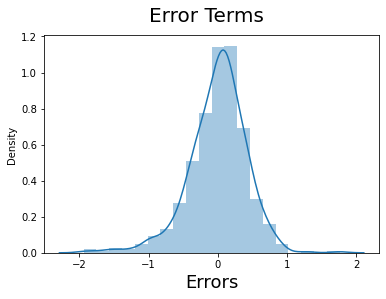

In [188]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred1), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)            

### Making Predictions

We would first need to scale the test set as well

In [189]:
X_train_rfe3.head()

,const,yr,holiday,temp,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_weather_2,weathersit_weather_3
367,1.0,1,0,-1.884077,1,0,0,0,0,0
648,1.0,1,0,-0.306750,0,1,0,0,0,0
44,1.0,0,0,-0.417439,1,0,0,0,0,0
705,1.0,1,0,-0.938605,0,1,0,0,1,0
379,1.0,1,0,-1.791834,1,0,0,0,0,0


In [190]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weather_2,weathersit_weather_3
184,0,1,0,29.793347,63.7917,5.459106,3065.0,2978.0,6043.0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,872.0,5339.0,6211.0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,240.0,2419.0,2659.0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,884.0,3896.0,4780.0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,736.0,4232.0,4968.0,0,...,0,0,0,1,0,0,0,0,0,0


In [191]:
# Apply scaler() to all the numerical columns , which is in differnt scale  
var = ['temp', 'hum', 'windspeed','cnt','casual','registered']

df_test[var] = scaler.transform(df_test[var])

In [192]:
df_test[var].describe()

,temp,hum,windspeed,cnt,casual,registered
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.142969,-0.094142,-0.025810,0.007000,0.017273,0.001291
std,1.057496,1.085093,0.961620,0.944987,1.090373,0.886727
min,-2.180052,-2.689775,-2.156754,-2.043633,-1.206259,-1.998955
25%,-0.792118,-0.798374,-0.734074,-0.553168,-0.803392,-0.549619
50%,0.101418,-0.240413,-0.077869,-0.030541,-0.209849,0.015467
75%,1.174876,0.562627,0.550769,0.596075,0.361436,0.548871
max,1.985450,2.447327,2.865566,1.987661,3.803242,1.870542


In [193]:
#X_test and y_test SPLIT

y_test = df_test.pop('cnt')
X_test = df_test.drop(['casual','registered'],axis=1)

In [194]:
selected_cols = X_train_rfe3.drop('const',axis=1).columns

In [195]:
X_test_rfe3 = X_test[selected_cols]

In [196]:
# Add a constant to the test set created
X_test_rfe3 = sm.add_constant(X_test_rfe3)
X_test_rfe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 146 non-null    float64
 1   yr                    146 non-null    int64  
 2   holiday               146 non-null    int64  
 3   temp                  146 non-null    float64
 4   season_spring         146 non-null    uint8  
 5   season_winter         146 non-null    uint8  
 6   mnth_Jul              146 non-null    uint8  
 7   mnth_Sep              146 non-null    uint8  
 8   weathersit_weather_2  146 non-null    uint8  
 9   weathersit_weather_3  146 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 6.6 KB


In [197]:
# Making predictions using Model 3
y_pred = lm3.predict(X_test_rfe3)

Text(0, 0.5, 'y_pred')

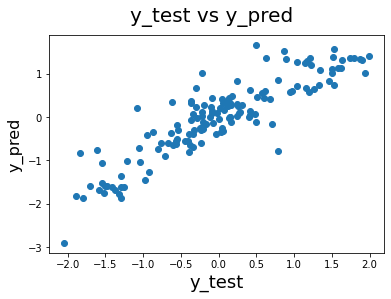

In [198]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## CHECKING r2 for TEST set

In [199]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7853221986002786

In [200]:
lm3.params

const                  -0.297302
yr                      1.027246
holiday                -0.475040
temp                    0.486923
season_spring          -0.511485
season_winter           0.269070
mnth_Jul               -0.310589
mnth_Sep                0.255674
weathersit_weather_2   -0.338391
weathersit_weather_3   -1.357346
dtype: float64

Hence,  for the model with 9 variables, the r-squared on training and test data is about 82.5% and 78.5% respectively. 
The adjusted r-squared on the train set is about is about 82.3%.

The model 3 is :
cnt(no of bikes demand) is exaplined as
  =  -0.297302 + (1.027246) yr + (-0.475040) holiday + (0.486923) temp + (-0.511485) season_spring + (0.269070) season_winter +(-0.310589) Mnth_July + (0.255674) mnth_sep + (-0.338391) weathersit_weather_2 + (-1.357346)weathersit_weather_3